# 1. 차원 축소(Dimension Reduction) 개요

**`단순 데이터 압축이 아니다`    
`데이터를 더 잘 설명하는 잠재적인 요소의 추출`**

차원 축소는 Lasso 개념과 유사하다   
둘다 X(feature) 를 줄이는 개념이다.  
Lasso 는 W 값을 0으로 만듦  
차원 축소는 ~~X 값의 개수 자체를 줄임~~  
피처를 저차원의 잠재적인 피처로 바꿈

- PCA, LDA, SVD, NMF 로 구성
- 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트로 생성하는 것  
**--> 데이터 축소해 새로운 차원의 데이터 세트로 구성하는 과정**
- 일반적으로 차원 증가시 데이터 간의 거리가 기하급수적으로 증가한다, 희소한 구조를 가짐

- 수백 개의 피처로 구성된 데이터 세트의 경우 예측신뢰도 떨어짐
--> 차원 증가 했으므로
- 피처가 많을 경우 개별 피처간의 상관관계가 높을 가능성 농후  
--> 피처들간의 상관관계가 발생한다는 말





## **구성**
- 피처 선택
    - 특정 피처에 종속성이 강한 피처는 아예 제거하고, 데이터의 특징을 잘 나타내는 피처만 선택
    - ex : 지난 시간 피처 예시
- 피처 추출
    - 기존 피처를 저차원의 중요 피처로 압축해서 추출하는 것
    - 기존의 피처값과 아예 다른 값이 됨
    - 피처를 더 잘 설명하는 또 다른 공간으로 매핑해 추출하는 것
    ex
        -학생부 에서 내신성적, 수능 성적, 봉사활동, 대외 활동에서  
        학업성취도, 커뮤니케이션 능력, 문제 해결 능력 매핑 

## 장점
- 데이터의 직관적인 해석 가능
    - 데이터를 시각적으로 압축해서 표현 가능
    - 데이터 처리 능력 감소 가능  
    --> 데이터의 갯수가 줄어듬으로 처리 시간 감소

## 차원 축소 알고리즘의 이미지 데이터에서의 수행
- 함축적 형태의 이미지 변환, 압축 수행 --> 성늘 향상
    - 과적합 방지 --> 성능 향상
        - 이미지 자체가 고차원이기에, 조금만 잘못된 정보의 차이가 엄청난 예측 실패로 `스노우볼 구름`

## 차원 축소 알고리즘의 텍스트에서의 활용
- 문서 내 단어들의 구성에서 시맨틱 의미나 토칙을 잠재 요소로 간주하고 매핑함
- SVD, NMF

# 2. PCA(Principal Component Analysis)

- 상관관계를 활용해서 `주성분을 추출하는 기법`
- 데이터 유실 발생
    - 데이터의 가장 높은 분산의 축으로 차원 축소 --> 이것이 주성분  
    `분산이 데이터의 특성을 가장 잘 나태낸다고 판단`
    

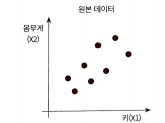

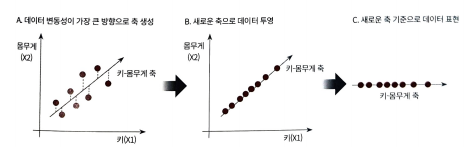

여기서 키- 몸무게 축이 가장 높은 분산의 축이다

## PCA 축 설정 기준
1. 가장 큰 데이터 변동성
2. 1.의 직교 벡터 
3. 2.의 직교 벡터

## 공분산 행렬 기준

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()

# 넘파이 데이터 세트를 판다스 DataFrame 으로 변환
columns = ['sepal_length', 'sepal_width', 'petal+length', 'prtal_width']
irisDF = pd.DataFrame(iris.data, columns = columns)
irisDF['target'] = iris.target
irisDF.head(3)


,sepal_length,sepal_width,petal+length,prtal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


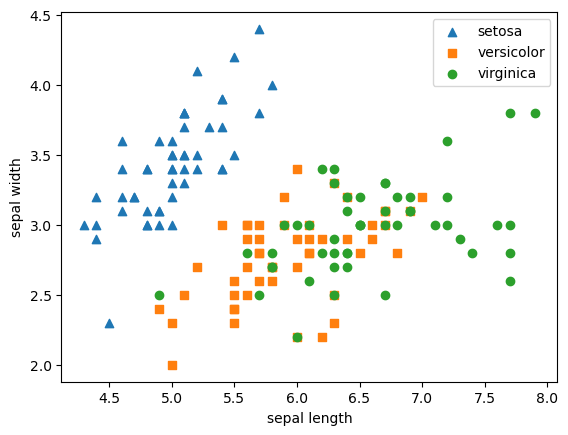

In [2]:
# setosa 는 세모, versicolor 는 네모, virginica 는 동그라미 표현
markers = ['^', 's', 'o']

# setosa 의 target 값은 0, versicolor 는 1, virginica 는 2, 각 target별로 다른 모양의 산점도 표시
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()
        

In [3]:
from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 StandardScaler 를 이용해 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:,:-1])

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

# fit() 과 transform() 을 호출해 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [5]:
# PCA 변환된 데이터의 칼럼명을 각각 pca_component_1, pca_component_2 로 명명
pca_columns = ['pca_component_1', 'pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns = pca_columns)
irisDF_pca['target'] = iris.target  
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


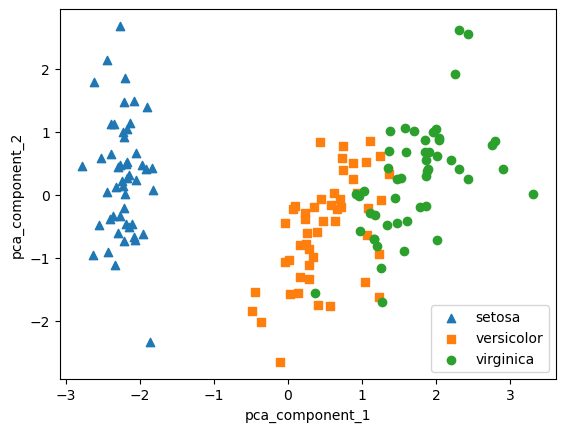

In [6]:
# setosa 를 세모, versicolor 를 네모, cirginica 를 동그라미로 표시
markers = ['^', 's', 'o']

# pca_component_1 을 x출, pc_component_2 를 y축으로 scatter plot 수행
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target'] == i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target'] == i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker = marker, label= iris.target_names[i])
    

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()
    

In [7]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


두개 만으로 원본 데이터 95%(72+22) 설명

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score 
import numpy as np

rcf = RandomForestClassifier(random_state = 156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring = 'accuracy', cv = 3)
print(' 원본 데이터 교차 검증 개별 정확도:', scores)
print(' 원본 데이터 평균 정확도:', np.mean(scores))

 원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
 원본 데이터 평균 정확도: 0.96


In [9]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring = 'accuracy', cv = 3) 
print(' PCA 변환 데이터 교차 검증 개별 정확도:', scores_pca)
print(' PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

 PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
 PCA 변환 데이터 평균 정확도: 0.88


In [14]:
!pip install xlrd>=1.0.0

In [15]:
#header 로 의미 없는 첫 행 제거, iloc 로 기존 id 제거
import pandas as pd

df = pd.read_excel('C:/Users/jamos/OneDrive - UOU/2023-2 학기/파이썬 머신러닝 완벽 가이드/도마뱀/default+of+credit+card+clients/pca_credit_card.xls', header = 1, sheet_name = 'Data').iloc[0:, 1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [18]:
df.rename(columns ={'PAY_0':'PAY_1', 'default payment next month': 'default'}, inplace = True)
y_target = df['default']
X_features = df.drop('default', axis = 1)    

<Axes: >

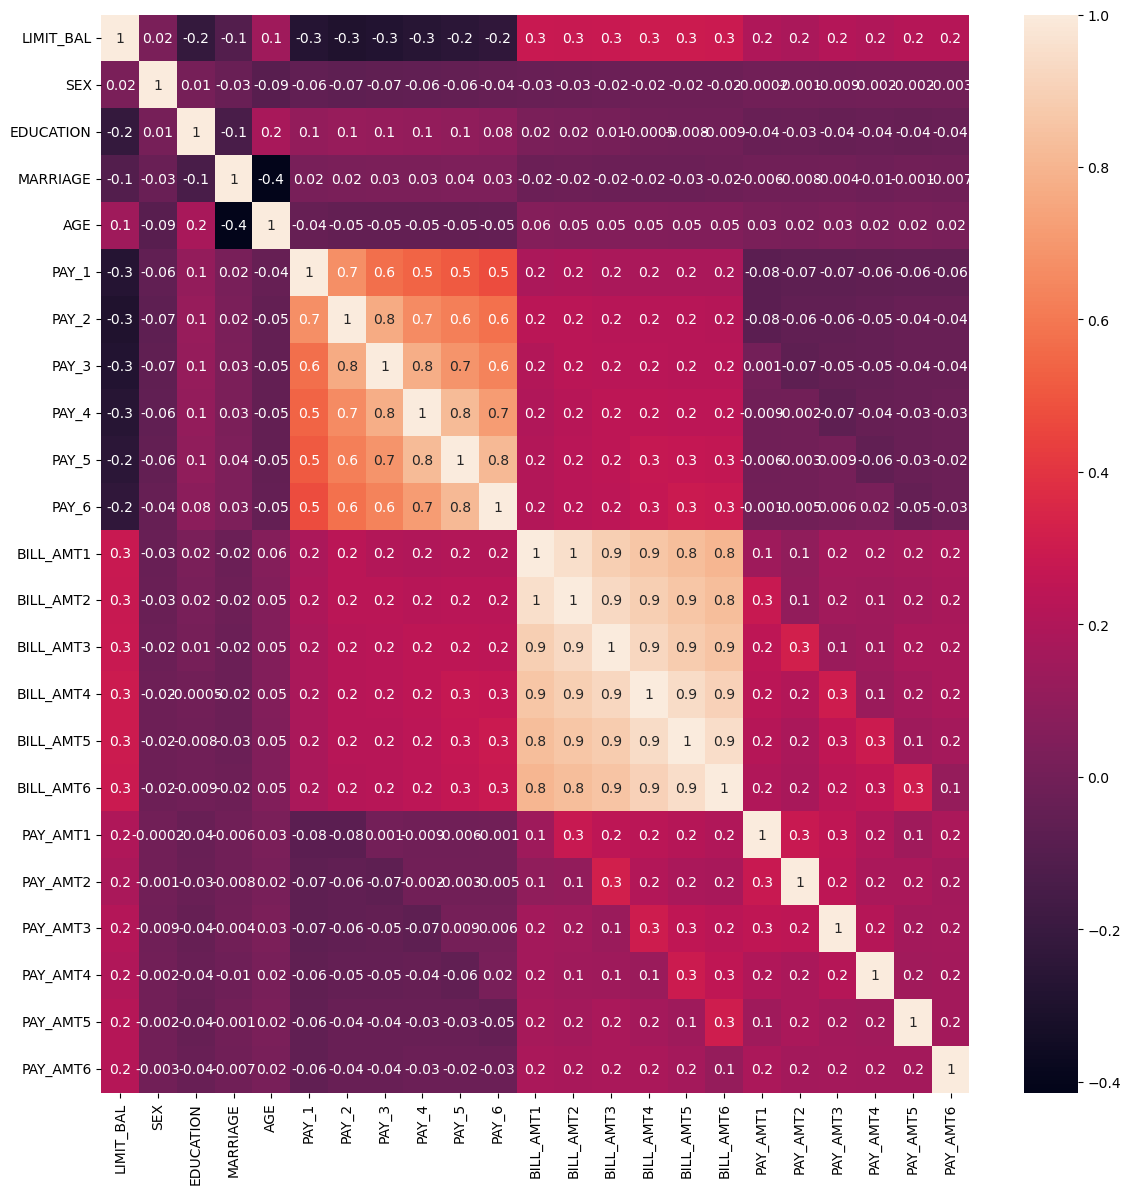

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize = (14, 14))
sns.heatmap(corr, annot = True, fmt = '.1g')

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# BILL_AMT1 ~ BILL_AMT6 까지 6개의 속성명 생성
cols_bill = ['BILL_AMT' + str(i) for i in range(1, 7)]
print('대상 속성명:', cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explanied_variance_ratio_ 계산을 위해 fit() 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components = 2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성:', pca.explained_variance_ratio_)


대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


In [23]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators = 300, random_state = 156)
scores = cross_val_score(rcf, X_features, y_target, scoring = 'accuracy', cv = 3)

print('CV = 3 인 경우의 개별 Fold 세트별 정확도:', scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

CV = 3 인 경우의 개별 Fold 세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170


In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터 세트에 먼저 StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 컴포넌트를 가진 PCA 변환을 수행하고 cross_val_score()로 분류 예측 수행.
pca = PCA(n_components = 6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target ,scoring = 'accuracy', cv = 3)

print('CV = 3 인 경우의 PCA 변환된 개별 Fold 세트 별 정확도:', scores_pca)
print('PCA 변환 데티어 세트 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

CV = 3 인 경우의 PCA 변환된 개별 Fold 세트 별 정확도: [0.7936 0.7981 0.8027]
PCA 변환 데티어 세트 평균 정확도:0.7981


# 3. LDA(Linear Discriminant Analysis)

## LDA 개요

## 붓꽆 데이터 세트에 LDA 적용하기

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)


In [26]:
lda = LinearDiscriminantAnalysis(n_components = 2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


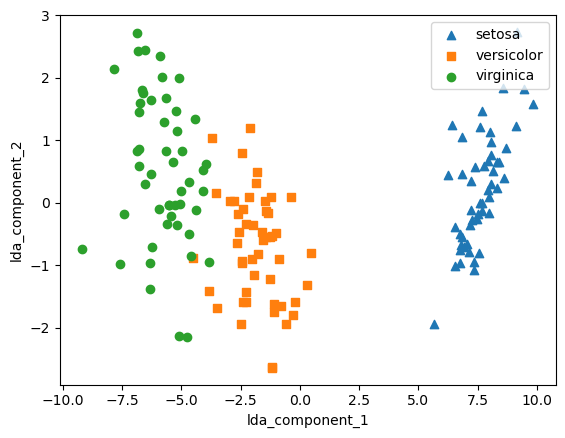

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns = ['lda_component_1', 'lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns = lda_columns)
irisDF_lda['target'] = iris.target  

# setosa 는 세모, versicolor 는 네모, virginica 는 동그라미 로 표현 
marker = ['^', 's', 'o']

# setosa 의 target 값은 0, versicolor 는 1, virginica 는 2, 각 target 별로 다른 모양으로 산점도로 표시.
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']
    
    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.target_names[i])
    
plt.legend(loc = 'upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

# 4. SVD(Singular Value Decomposition)

## SVD 개요

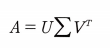

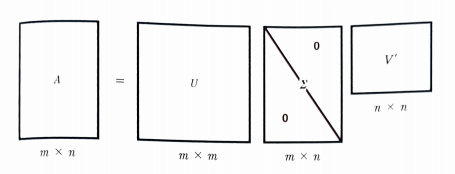

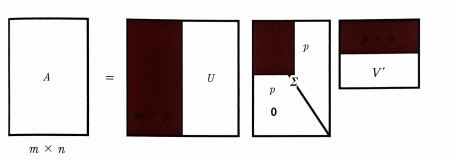

In [29]:
# numpy 의 svd 모듛 임포트
import numpy as np
from numpy.linalg import svd

# 4 * 4 랜덤 행렬 a 생성
np.random.seed(121)
a = np.random.randn(4, 4)   
print(np.round(a, 3))


[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [30]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n', np.round(U, 3))
print('Sigma Value:\n', np.round(Sigma, 3))
print('V transpose matrix:\n', np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [31]:
# Sigma 를 다시 0을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [32]:
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [35]:
# 다시 SVD 를 수행해 Sigma 값 확인
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n', np.round(Sigma, 3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


In [36]:
# U 행렬의 경우는 Sigma 와 내적을 수행하므로 Sigma 의 앞 2행에 대응되는 앞 2열만 추출
U_ =  U[:, :2]
Sigma_ = np.diag(Sigma[:2])

# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U, Sigma, Vt 의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_, Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [39]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고 SVD를 적용할 경우 U, Sigma, Vt의 차원 확인
np.random.seed(121)
matrix = np.random.random((6, 6))
print('원본 행렬:\n', matrix)
U, Sigma, Vt = svd(matrix, full_matrices = False)
print('\n 분해 행렬 차원:', U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

# Truncated SVD 로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행.
num_components = 4  
U_tr, Sigma_tr, Vt_tr = svds(matrix, k = num_components)
print('\nTruncated SVD 분해 행렬 차원:', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma 값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr) # output of TruncatedSVD

print('\nTruncated SVD 로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

 분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma 값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD 로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.726732

U, , Sigma, Vr 로 분해 하여 작성하는 차원 축소

## 사이킷런 TruncatedSVD 클래스를 이용한 변환

Text(0, 0.5, 'TrucatedSVD Component 2')

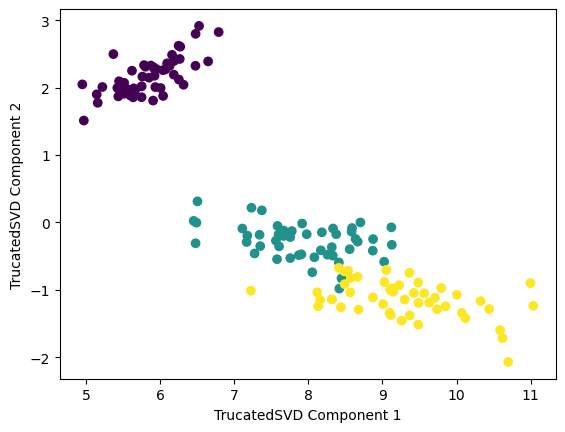

In [1]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data

# 2개의 주요 컴포넌트로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components = 2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# 산점도 2차원 으로 TruncatedSVD 변환된 데이터 표현. 품종은 색깔로 표현.
plt.scatter(x = iris_tsvd[:, 0], y= iris_tsvd[:, 1], c = iris.target)
plt.xlabel('TrucatedSVD Component 1')
plt.ylabel('TrucatedSVD Component 2')



Text(0.5, 1.0, 'PCA Transformed')

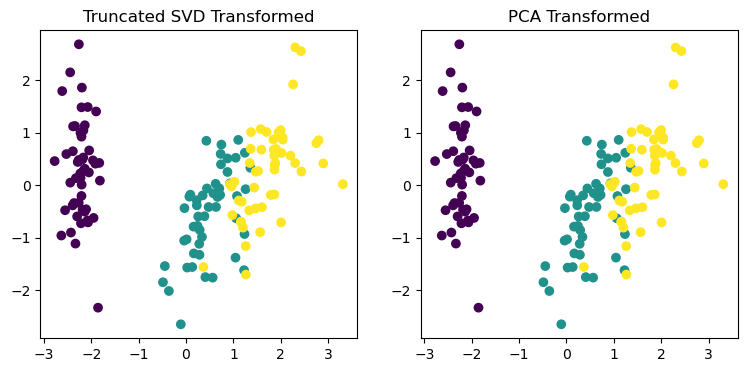

In [2]:
from sklearn.preprocessing import StandardScaler

# 붓꽃 데이터를 StandardScaler 로 변환
scaler = StandardScaler()
iris_scaled =  scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd = TruncatedSVD(n_components = 2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행.
pca = PCA(n_components = 2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA 변환 데이터를 오른쪽에 표현.
fig, (ax1, ax2) = plt.subplots(figsize = (9, 4), ncols = 2)
ax1.scatter(x = iris_tsvd[:, 0], y = iris_tsvd[:, 1], c = iris.target)
ax2.scatter(x = iris_pca[:, 0], y = iris_pca[:, 1], c = iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

In [5]:
print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())

2.352782320820997e-15
-2.168404344971009e-18


# 5. NMF(Non - Negative Matrix Factorization)

## NMF 개요

c:\Users\jamos\anaconda3\Lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Text(0, 0.5, 'NMF Component 2')

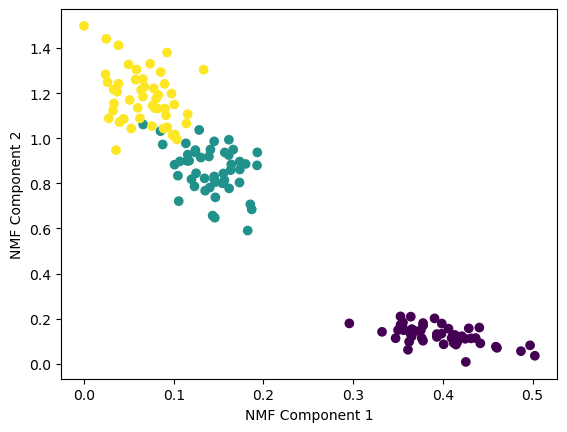

In [6]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data   
nmf = NMF(n_components = 2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x = iris_nmf[:, 0], y = iris_nmf[:, 1], c = iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')
